# Numerically solving algebraic equations in Python


In many problems that we will encounter, we will need to find the solution to an algebraic equation or a set of algebraic equations.  While certain situations, these equations can be solved analytically, often this is not possible.  In this case, numerical methods need to be used.  In this notebook, we demonstrate how to use Python to solve algebraic equations.  Note that these equations can be non-linear, and as a result, there is the possibility that they can can no solutions or multiple solutions.

## Solving a single algebraic equation

Let's try to solve the equation
\begin{align*}
x = e^{-x}
,
\end{align*}
which cannot be solved analytically.

The first thing we do to find a numerical solution is to transform the equation into a form $f(x)=0$:
\begin{align*}
x - e^{-x} = 0
\end{align*}
If we define the function $f(x)=x - e^{-x}$, we see that for a general value of $x$, the function is not equal to zero; values of $x$ where $f(x)=0$ correspond to solutions of the equation.  Let's see what this function looks like on a plot.


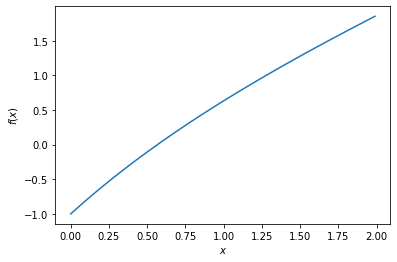

In [7]:
import pylab as plt
import numpy as np

def f(x):
    return x - np.exp(-x)


x_data = np.arange(0.0, 2.0, 0.01)
y_data= [f(x) for x in x_data]
plt.plot(x_data, y_data)

plt.xlabel(r'$x$')
plt.ylabel(r'$f(x)$')

plt.show()

From this plot, we see that the function crosses zero once, at least for the range of values of $x$ that we have examined.  This implies that there is exactly one solution within this range of values. 

We can obtain an estimate of the solution by using the bisection method, where we slowly close in on the value of $x$ at which $f(x)=0$.  This can be done using the `bisect` function from the`scipy.optimize` library.  For more information on the use of this function, your can refer to its `scipy` reference 
[page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.bisect.html).

In order to use `bisect`,
first, we define the function $f$, and then we need to pass it the values of $x$ which bracket the solution.  From the graph, we can use $x_{\rm min}=0.0$ and $x_{\rm max}=2.0$.

### Using the function `bisect`

In [6]:
def f(x):
    return x - np.exp(-x)


from scipy.optimize import bisect

xmin = 0.0
xmax = 2.0
solution = bisect(f, a=xmin, b=xmax)

print(solution)

0.5671432904109679


You should test `bisect` by trying to find the solution to other equations (e.g., finding the zeros of a quadratic or cubic polynomial) and see what happens when there are multiple roots in an interval.

The advantage of using `bisect` is that it will always find a root.  A disadvantage, however, this requires that you already know the region in which a solution to the equation exists.  Another disadvantage is that it is limited to solving a single algebraic equation.



### Using the function `fsolve`

Another function that we can use to solve algebraic equations, as well as systems of algebraic equations, is `fsolve`, again from the `scipy.optimize` library.  To solve a single algebraic equation, `fsolve` works very similarly to `bisect`.  First we need to create the function $f$; however, this time, we need an initial guess for the solution.  A code for solving the equation $f(x)=0$ is shown below

In [ ]:
import numpy as np
from scipy.optimize import fsolve

x0 = 1.0
solution = fsolve(f, x0)

print(solution)

If an equation has multiple solutions, then the particular solution that `fsolve` finds will depend on the initial guess.  One big disadvantage of `fsolve` is that even if an equation has a solution, it may not be able to find it.  Its ability to locate the solution depends on the quality of the initial guess.

## Solving systems of algebraic equations

Now let's explore the solution of systems of equations.  Consider the following:
\begin{align*}
y &= x
\\
x^2 + y^2 &= 1
\end{align*}
The first equation represents a line passing through the origin with a slope of $+1$, while the second equation is a circle of radius $1$ that is centered at the origin.  Graphically, the solution corresponds to an intersection between the line and the circle.  A plot of this is shown below.

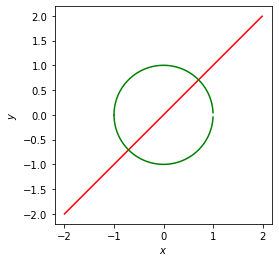

In [9]:
from pylab import *
from numpy import *


x_data = arange(-2.0, 2.0, 0.01)
y_data = [x for x in x_data]
plot(x_data, y_data, color='red')

x_data = arange(-1.0, 1.0, 0.001)
y_data = [np.sqrt(1.0-x**2) for x in x_data]
plot(x_data, y_data, color='green')
y_data = [-np.sqrt(1.0-x**2) for x in x_data]
plot(x_data, y_data, color='green')

xlabel(r'$x$')
ylabel(r'$y$')

ax = gca() #you first need to get the axis handle
ax.set_aspect(1) #sets the height to width ratio to 1.5.
show()




As with the case for solving one equation, we need to recast these equations in the form $f(x,y)=0$ and $g(x,y)=0$:
\begin{align*}
f(x,y) &= y - x
\\
g(x,y) &= x^2 + y^2 - 1
\end{align*}

In order to use `fsolve` to determine the solution of these equations, we need to create a function that will tell it what the values of $f$ and $g$ for any value of $x$ and $y$.  `fsolve` will pass the values of $x$ and $y$ to this function as a list, and it expects the function to return the values of $f$ and $g$ in a list.

In the code below, we call this function `residual`.  As an initial guess for the solution, we use $x=1$ and $y=0$.

In [10]:
from scipy.optimize import fsolve

def residual(x):
    
    f = []
    f.append( x[0] - x[1] )
    f.append( x[0]**2 + x[1]**2 - 1.0)
    
    return f

x0 = [1.0, 0.0]
solution = fsolve(residual, x0)
print(solution)


[0.70710678 0.70710678]


For this guess we find the solution where both $x$ and $y$ are positive.  Try to see what happens when you use different initial guesses.  You can also try to solve other equations, such as the intersection of a parabola and a circle.

For more information on `fsolve`, consult the `scipy` reference [page](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fsolve.html).

Examples of using `bisect` and `fsolve` to solve CP101 problems can be found at the links below:
- CP101: Tutorial 17, Question 1: [binder](https://mybinder.org/v2/gh/mjksill/CP213-online.git/master?filepath=notebooks/CP101T17Q1.ipynb) or [colab](https://colab.research.google.com/github/mjksill/CP213-online/blob/master/notebooks/CP101T17Q1.ipynb)
- CP101: Tutorial 17, Question 1, alternate solution: [binder](https://mybinder.org/v2/gh/mjksill/CP213-online.git/master?filepath=notebooks/CP101T17Q1-2.ipynb) or [colab](https://colab.research.google.com/github/mjksill/CP213-online/blob/master/notebooks/CP101T17Q1-2.ipynb)
- CP101: Tutorial 17, Question 2: [binder](https://mybinder.org/v2/gh/mjksill/CP213-online.git/master?filepath=notebooks/CP101T17Q2.ipynb) or [colab](https://colab.research.google.com/github/mjksill/CP213-online/blob/master/notebooks/CP101T17Q2.ipynb)
- CP101: Example 7.5: [binder](https://mybinder.org/v2/gh/mjksill/CP213-online.git/master?filepath=notebooks/CP101E7.5.ipynb) or [colab](https://colab.research.google.com/github/mjksill/CP213-online/blob/master/notebooks/CP101E7.5.ipynb)
